<a href="https://colab.research.google.com/github/Risky0204/Quiz_PCD/blob/main/QuizPCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Moh.Risky Mardjuku
NIM : F55122005


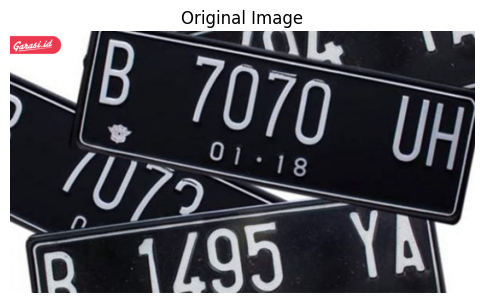

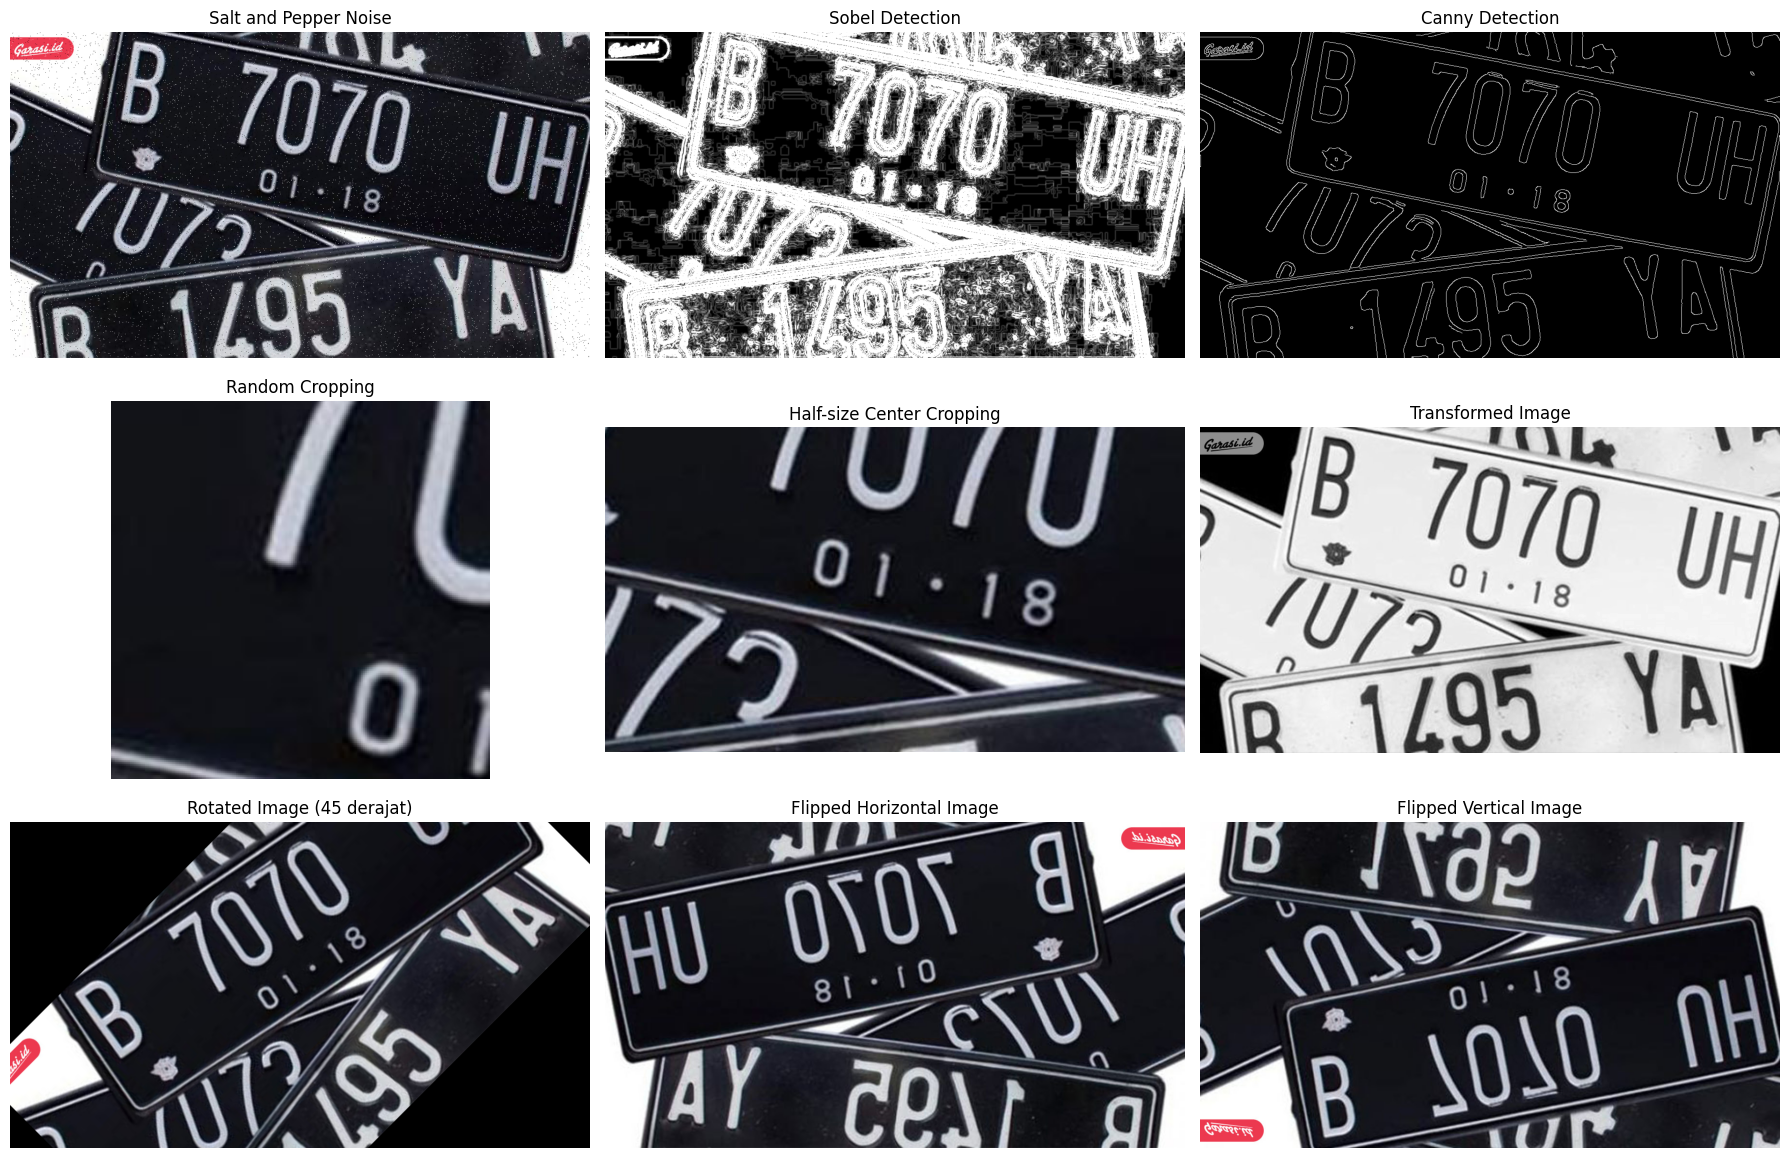

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print ("Nama : Moh.Risky Mardjuku")
print ("NIM : F55122005")

def edge_detection_sobel(image):
    # Konversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan filter Sobel
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

    return sobel_combined

def edge_detection_canny(image):
    # Konversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan metode Canny
    canny = cv2.Canny(gray, 100, 200)

    return canny

def random_crop(image, crop_height, crop_width):
    h, w = image.shape[:2]
    top = np.random.randint(0, h - crop_height)
    left = np.random.randint(0, w - crop_width)
    bottom = top + crop_height
    right = left + crop_width
    cropped = image[top:bottom, left:right]
    return cropped

def half_size_center_crop(image):
    h, w = image.shape[:2]
    center_h, center_w = h // 2, w // 2
    cropped = image[center_h - h // 4:center_h + h // 4, center_w - w // 4:center_w + w // 4]
    return cropped

def transform_image(image):
    # Konversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Mengganti putih menjadi hitam dan sebaliknya
    inverted = cv2.bitwise_not(gray)

    return inverted

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt_pixels = np.random.rand(*image.shape[:2]) < salt_prob
    pepper_pixels = np.random.rand(*image.shape[:2]) < pepper_prob
    noisy_image[salt_pixels] = [255, 255, 255]
    noisy_image[pepper_pixels] = [0, 0, 0]
    return noisy_image

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def flip_image_vertical(image):
    return cv2.flip(image, 0)

def flip_image_horizontal(image):
    return cv2.flip(image, 1)

if __name__ == "__main__":
    # Ganti nama file dengan nama gambar yang ingin Anda gunakan
    file_path = '/content/plat.jpeg'

    # Baca gambar menggunakan OpenCV
    original_image = cv2.imread(file_path)

    # Tambahkan salt and pepper noise pada gambar asli
    noisy_image = add_salt_and_pepper_noise(original_image, salt_prob=0.01, pepper_prob=0.01)

    # Deteksi tepi menggunakan Sobel
    sobel_edges = edge_detection_sobel(original_image)

    # Deteksi tepi menggunakan Canny
    canny_edges = edge_detection_canny(original_image)

    # Cropping gambar secara acak
    cropped_random = random_crop(original_image, 200, 200)

    # Cropping setengah ukuran dari pusat
    cropped_center = half_size_center_crop(original_image)

    # Transformasi warna gambar
    transformed_image = transform_image(original_image)

    # Transformasi geometri: rotasi
    rotated_image = rotate_image(original_image, angle=45)

    # Transformasi geometri: flip vertikal
    flipped_vertical_image = flip_image_vertical(original_image)

    # Transformasi geometri: flip horizontal
    flipped_horizontal_image = flip_image_horizontal(original_image)

    # Tampilkan gambar original terlebih dahulu di luar subplot
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Tampilkan hasil gambar dalam subplot
    plt.figure(figsize=(18, 12))

    plt.subplot(331)
    plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
    plt.title('Salt and Pepper Noise')
    plt.axis('off')

    plt.subplot(332)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel Detection')
    plt.axis('off')

    plt.subplot(333)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Detection')
    plt.axis('off')

    plt.subplot(334)
    plt.imshow(cv2.cvtColor(cropped_random, cv2.COLOR_BGR2RGB))
    plt.title('Random Cropping')
    plt.axis('off')

    plt.subplot(335)
    plt.imshow(cv2.cvtColor(cropped_center, cv2.COLOR_BGR2RGB))
    plt.title('Half-size Center Cropping')
    plt.axis('off')

    plt.subplot(336)
    plt.imshow(transformed_image, cmap='gray')
    plt.title('Transformed Image')
    plt.axis('off')

    plt.subplot(337)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Rotated Image (45 derajat)')
    plt.axis('off')

    plt.subplot(338)
    plt.imshow(cv2.cvtColor(flipped_horizontal_image, cv2.COLOR_BGR2RGB))
    plt.title('Flipped Horizontal Image')
    plt.axis('off')

    plt.subplot(339)
    plt.imshow(cv2.cvtColor(flipped_vertical_image, cv2.COLOR_BGR2RGB))
    plt.title('Flipped Vertical Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()